In [21]:
%matplotlib inline
import numpy as np
from numpy import*
import matplotlib.pyplot as plt

from scipy import interpolate

from scipy.special import factorial
from scipy import fftpack
from skimage import io
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy import signal
import scipy.ndimage as nd

import glob

# Projeto I

## Descrição
## Objetivos

- Criar um fitlro gaussiano usando convolução e transformada de Fourrier

## Parâmetros

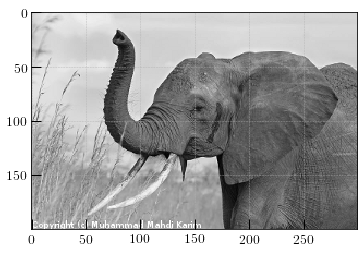

In [22]:
img_filename="elephant.png"
factor=0.01
sigma=10
n_points=30
bounds=500

img = plt.imread(img_filename)
img = io.imread(img_filename, as_grey=True)
plt.imshow(img, cmap="gray")
plt.show()

## Distribuição Gaussiana

A variável gauss contem os pontos da distribuição gaussiana dentro dos limites, "bounds" 

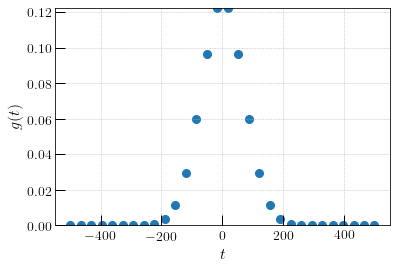

In [23]:
# First a 1-D  Gaussian
t = linspace(-bounds, bounds, n_points)
gauss = exp(-factor*(t)**2/sigma**2.)/(sqrt(2.*pi*sigma))

sum_gauss = "{:.2f}".format(np.trapz(gauss)) 
plt.scatter(t, gauss)
plt.ylabel(R"$g(t)$")
plt.xlabel(R"$t$")
plt.ylim(0, max(gauss))
plt.show()

Note que  a distribuição não está normalizada, tal que a soma é {{sum_gauss}} 

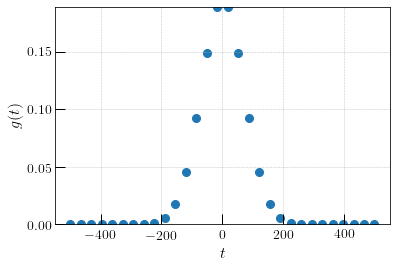

In [24]:
gauss /= np.trapz(gauss) 
sum_gauss = "{:.2f}".format(np.trapz(gauss)) 
plt.scatter(t, gauss)
plt.ylabel(R"$g(t)$")
plt.xlabel(R"$t$")
plt.ylim(0, max(gauss))
plt.show()

Normalizando a distirbuição através da integral númerica (trapésios)  temos que a soma é {{sum_gauss}}. Tendo a distribuição gaussiana pronta, $g(t)$, construímos agora o núcleo, $\mathbf k$, 


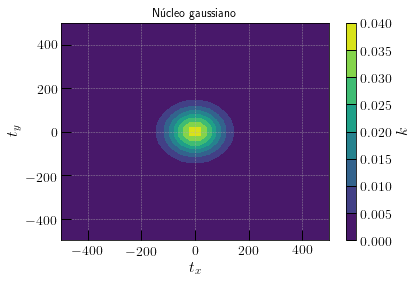

In [25]:
X, Y = np.meshgrid(t, t)
kernel = gauss[:, np.newaxis] * gauss[np.newaxis, :]
countour = plt.contourf(X, Y, kernel)
cbar = plt.colorbar(countour)
plt.xlabel(R"$t_x$")
plt.ylabel(R"$t_y$")
cbar.ax.set_ylabel(R"$k$")
plt.title("Núcleo gaussiano")
plt.show()

Agora aplicamos a transformada de fourrier no núcleo gaussiano tendo uma tamanho de janela igual a dimensão da imagem original

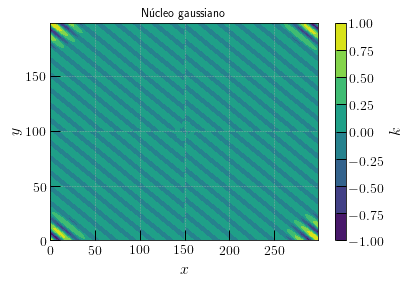

In [26]:

kernel_ft = fftpack.fft2(kernel, shape=img.shape, axes=(0, 1))


countour = plt.contourf( kernel_ft.real)
cbar = plt.colorbar(countour)
plt.xlabel(R"$x$")
plt.ylabel(R"$y$")
cbar.ax.set_ylabel(R"$k$")
plt.title("Núcleo gaussiano")
plt.show()

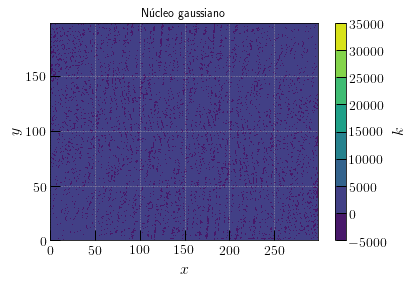

In [27]:

# convolve
img_ft = fftpack.fft2(img, axes=(0, 1))

countour = plt.contourf( img_ft.real)
cbar = plt.colorbar(countour)
plt.xlabel(R"$x$")
plt.ylabel(R"$y$")
cbar.ax.set_ylabel(R"$k$")
plt.title("Núcleo gaussiano")
plt.show()

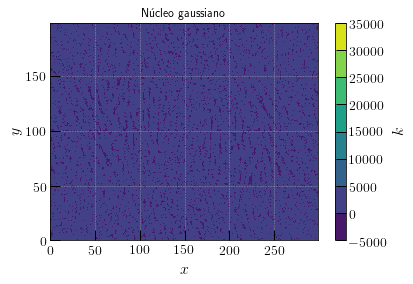

In [28]:
# convolve

img2_ft = kernel_ft[:, :] * img_ft

countour = plt.contourf( img2_ft.real)
cbar = plt.colorbar(countour)
plt.xlabel(R"$x$")
plt.ylabel(R"$y$")
cbar.ax.set_ylabel(R"$k$")
plt.title("Núcleo gaussiano")
plt.show()

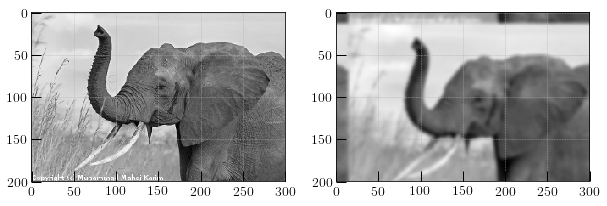

In [29]:


# the 'newaxis' is to match to color direction

#aplica a inversa da transformada
img2 = fftpack.ifft2(img2_ft, axes=(0, 1)).real

# clip values to range
#img2 = np.clip(img2, 0, 1)

# plot output
fig, ax = plt.subplots(1, 2, figsize=(10, 20))
ax[0].imshow(img, cmap="gray")
ax[1].imshow(img2, cmap = "gray")
plt.show()

# Projeto II e III

## Descrição
## Objetivos

- Criar um fitlro gaussiano usando convolução e transformada de Fourrier

In [369]:
import scipy.ndimage as nd

def apply_dof(
        img,
        points,
        factor_x,
        factor_y,
        sigma_x,
        sigma_y,
        scale_x,
        scale_y,
        theta
    ):
    

    xs = linspace(img.shape[0]/2, img.shape[0]/2, points)
    ys = linspace(img.shape[1]/2, img.shape[1]/2, points)
 
    
    img_ft = fftpack.fft2(img, axes=(0, 1))
    
    #gauss_1_x = exp(-factor_1_x*(ts-t0_1_x)**2/sigma_1_x**2.)/(sqrt(2.*pi*sigma_1_x**2.))
    #gauss_1_y = exp(-factor_1_x*(ts-t0_1_y)**2/sigma_1_y**2.)/(sqrt(2.*pi*sigma_1_y**2.))

    #gauss_2_x = exp(-factor_2_x*(ts-t0_2_x)**2/sigma_2_x**2.)/(sqrt(2.*pi*sigma_2_x**2.))
    #gauss_2_y  = exp(-factor_2_y*(ts-t0_2_y )**2/sigma_2_y**2.)/(sqrt(2.*pi*sigma_2_y**2.))

    #gauss_1_x /= np.trapz(gauss_1_x) 
    #gauss_2_x /= np.trapz(gauss_2_x)
    #gauss_1_y /= np.trapz(gauss_1_y) 
    #gauss_2_y /= np.trapz(gauss_2_y) 
    #dof = gauss_1 - gauss_2

    
    
    kernel = gauss_1_y[:, np.newaxis] * gauss_1_x[np.newaxis, :]

    kernel_ft_1 = fftpack.fft2(kernel, shape=img.shape, axes=(0, 1))

    kernel = gauss_2_y[:, np.newaxis] * gauss_2_x[np.newaxis, :]

    kernel_ft_2 = fftpack.fft2(kernel, shape=img.shape, axes=(0, 1))

    kernel_ft = kernel_ft_2 - kernel_ft_1

    img2_ft = kernel_ft[:, :] * img_ft

    # the 'newaxis' is to match to color direction

    #aplica a inversa da transformada
    img2 = fftpack.ifft2(img2_ft, axes=(0, 1)).real
    #img2 = np.clip(img2, 0, 1)
    return img2, gauss_1_x, gauss_1_y, gauss_2_x, gauss_2_y


def apply_log(img, sigma=2):
    log = nd.gaussian_laplace(img, sigma)
    return log


def apply_bin(img, neighs):
    img[np.where(img <= 0.0)] = -1
    img[np.where(img > 0.0)] = 1
    new_img = zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            val = img[i, j]
            vals_neigh = []
            for dx, dy in neighs:
                try:
                    vals_neigh.append(img[i+dx, j+dy])
                except:
                    pass
            borda = any([val*n <0 for n in vals_neigh])
            #borda = len(list(filter(lambda r: r < 0 , [val*n for n in vals_neigh]))) >2
            new_img[i, j] = 1 if borda else 0.
    return new_img


def get_neighs(n_neighs):
    neighs =  [(1, 0), (-1, 0), (0, 1), (0, -1)]
    if n_neighs==8:
         neighs += [(1, 1), (-1, 1), (-1, -1), (1, -1)]
    return neighs

## Projeto II




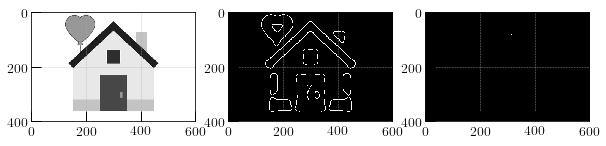

In [370]:

def apply_dof(
        img,
        points,
        A,
        scales_x,
        scales_y,
        sigmas_x,
        sigmas_y,
        scale_x,
        theta=0.
    ):
    


    xs = linspace(img.shape[0]/2, img.shape[0]/2, points)
    ys = linspace(img.shape[1]/2, img.shape[1]/2, points)
    X, Y = np.meshgrid(xs, ys)

    img_ft = fftpack.fft2(img, axes=(0, 1))
    kernels = [
        get_gauss(A, scale_x, scale_y, sigma_x, sigma_y,X[:], Y[:], theta=0)
        for scale_x, scale_y, sigma_x, sigma_y in zip(scales_x, scales_y, sigmas_x, sigmas_y)
    ]
    kernels_ft = [
        fftpack.fft2(kernel, shape=img.shape, axes=(0, 1))
        for kernel in kernels
    ]
    #gauss_1_x = exp(-factor_1_x*(ts-t0_1_x)**2/sigma_1_x**2.)/(sqrt(2.*pi*sigma_1_x**2.))
    #gauss_1_y = exp(-factor_1_x*(ts-t0_1_y)**2/sigma_1_y**2.)/(sqrt(2.*pi*sigma_1_y**2.))

    #gauss_2_x = exp(-factor_2_x*(ts-t0_2_x)**2/sigma_2_x**2.)/(sqrt(2.*pi*sigma_2_x**2.))
    #gauss_2_y  = exp(-factor_2_y*(ts-t0_2_y )**2/sigma_2_y**2.)/(sqrt(2.*pi*sigma_2_y**2.))

    #gauss_1_x /= np.trapz(gauss_1_x) 
    #gauss_2_x /= np.trapz(gauss_2_x)
    #gauss_1_y /= np.trapz(gauss_1_y) 
    #gauss_2_y /= np.trapz(gauss_2_y) 
    #dof = gauss_1 - gauss_2

    
    
    #kernel = gauss_1_y[:, np.newaxis] * gauss_1_x[np.newaxis, :]

    #kernel_ft_1 = fftpack.fft2(kernel, shape=img.shape, axes=(0, 1))

    #kernel = gauss_2_y[:, np.newaxis] * gauss_2_x[np.newaxis, :]

    #kernel_ft_2 = fftpack.fft2(kernel, shape=img.shape, axes=(0, 1))

    kernel_ft = kernels_ft[1] - kernels_ft[0]

    img_ft = kernel_ft[:, :] * img_ft

    # the 'newaxis' is to match to color direction

    #aplica a inversa da transformada
    img = fftpack.ifft2(img_ft, axes=(0, 1)).real
    #img2 = np.clip(img2, 0, 1)
    return img, X, Y, kernels_ft[0], kernels_ft[1]

def dof_uniform(
    img_filename="home.png",
        factor=0.01,
        sigma_0=20,
        dsigma=0.001,
        dt = 0.,
        n_points=30,
        bounds=500,
        n_neighs = 8
    ):
    t0 =0.
    img = io.imread(img_filename, as_grey=True)


    neighs = get_neighs(n_neighs)
    
    ts = linspace(-bounds, bounds, n_points)
    img2, gauss_1_x, gauss_1_y, gauss_2_x, gauss_2_y = apply_dof(
        img,
        ts,
        factor,
        factor,
        factor,
        factor,
        sigma_0+dsigma,
        sigma_0+dsigma,
        sigma_0-dsigma,
        sigma_0-dsigma,
        t0+dt,
        t0+dt,
        t0-dt,
        t0-dt,
    )
    #img2 = (img2 > threshold).astype(np.int_)
    img2 = apply_bin(img2, neighs)
    fig, ax = plt.subplots(1,3, figsize=(15, 5))
    ax[0].scatter(ts, gauss_1_x)
    ax[0].scatter(ts, gauss_2_x)
    #plt.scatter(t, dof)

    ax[0].set_ylabel(R"$g(t)$")
    ax[0].set_xlabel(R"$t$")
    ax[1].imshow(img, cmap="gray")
    

    ax[2].imshow(img2, cmap="gray")
    plt.show()
    

    
def log_uniform(
        img_filename="home.png",
        sigma = 20,
        dt = 0,
        n_points=30,
        bounds=500,
        n_neighs = 8

    ):
    img = io.imread(img_filename, as_grey=True)

    neighs = get_neighs(n_neighs)
    xs = linspace(-img.shape[0]//2, img.shape[0]//2, n_points)
    ys = linspace(-img.shape[1]//2, img.shape[1]//2, n_points)
    
    #img2_custom = apply_custom_log(img, sigma, ts)

    def get_log(x, y):
        arg = -(x**2+y**2)/(2.*sigma**2.)
        result = -1/(pi*sigma**4)
        result *= exp(arg)
        result *= (1+arg)
        return result
    
    
    X, Y = np.meshgrid(xs, ys)
    log_kernel = get_log(X, Y)
    log_kernel_ft = fftpack.fft2(log_kernel, shape=img.shape, axes=(0, 1))

    img_ft = fftpack.fft2(img, axes=(0, 1))

    
  
    img2_ft = log_kernel_ft[:, :] * img_ft


    # the 'newaxis' is to match to color direction

    #aplica a inversa da transformada
    img2_custom = fftpack.ifft2(img2_ft, axes=(0, 1)).real
    img3 = apply_log(img, sigma)
    
    img3 = apply_bin(img3, neighs)
    img2_custom = apply_bin(img2_custom, neighs)
    fig, ax = plt.subplots(1,3, figsize=(10, 5))
   
    ax[0].imshow(img, cmap="gray")
    

    ax[1].imshow(img3, cmap="gray")
    ax[2].imshow(img2_custom, cmap="gray")

    plt.show()
    
log_uniform(sigma=10)

In [371]:
interactive_plot = interactive(
                                log_uniform,
                                img_filename=glob.glob('*.png'),
                                sigma=(1, 20.0, .1),
                                n_neighs = [4, 8]    
                              )
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(Dropdown(description='img_filename', index=3, options=('casa1.png', 'elephant.png', 'hel…

In [252]:
#img_filename="elephant.png"



interactive_plot = interactive(
                                dof_uniform,
                                img_filename=glob.glob('*.png'),
                                factor=(0.01, .1, .001),
                                sigma0=(1, 20.0, .1),
                                dsigma=(0.01, .5, .001),
                                dt=(0.0, .5, .001),
                                bounds=500,
                                n_neighs = [4, 8]
                                    
                              )
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot



interactive(children=(Dropdown(description='img_filename', index=2, options=('elephant.png', 'hellblazer.png',…

In [253]:
dof_uniform(
    img_filename="home.png",
        factor=0.01,
        sigma_0=20,
        dsigma=0.001,
        dt = 0.,
        n_points=30,
        bounds=500,
        n_neighs = 8
    )

TypeError: apply_dof() takes from 8 to 9 positional arguments but 14 were given

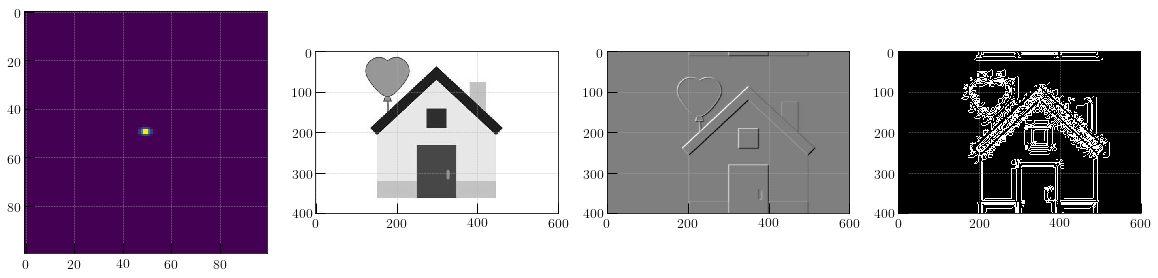

In [393]:
def imread(img_filename):
    img = io.imread(img_filename, as_grey=True)

    img = (255*((img - np.min(img))/(np.max(img)-np.min(img)))).astype(np.uint8)
    
    return img

def get_gauss(
        A,
        factor_x,
        factor_y,
        sigma_0,
        dt,
        x,
        y,
        theta,
    ):
    sigma_x = sigma_0*factor_x
    sigma_y = sigma_0*factor_y


    a = ((cos(theta)**2) / (2*sigma_x**2)) + ((sin(theta)**2) / (2*sigma_y**2))


    b = -((sin(2*theta)) / (4*sigma_x**2)) + ((sin(2*theta)) / (4*sigma_y**2))
    c = ((sin(theta)**2) / (2*sigma_x**2)) + ((cos(theta)**2) / (2*sigma_y**2))


    g = A*exp(-a*(x-dt)**2 - 2*b*(x-dt)*(y-dt) - c*(y-dt)**2)
    return g
def apply_dof(
        img,
        points,
        A,
        factor_x=1,
        factor_y=1,
        sigma_0=1,
        dts=[.1, -.1],
        theta=0.,
        bounds =400
    ):
    

    img_ft = fftpack.fft2(img, axes=(0, 1))

    xs = linspace(-img.shape[0]/2, img.shape[0]/2, points)
    ys = linspace(-img.shape[1]/2, img.shape[1]/2, points)

    X, Y = np.meshgrid(xs, ys)

    kernels = [
        get_gauss(A, factor_x, factor_y, sigma_0, dt,X[:], Y[:], theta)
        for  dt in dts
    ]
    
    DoG = kernels[0]-kernels[1]
    kernel_ft = fftpack.fft2(DoG, shape=img.shape, axes=(0, 1))

    img_ft = kernel_ft[:, :] * img_ft

   
    img2 = fftpack.ifft2(img_ft, axes=(0, 1)).real
    
    return img2, X, Y, kernels[0], kernels[1]

def dof_uniform(
    img_filename="home.png",
        A=1,
        factor_x=1,
        factor_y=1,
        sigma_0=1,
        dt=.1,
        theta=0,
        n_points=30,
        bounds=400,
        n_neighs = 4
    ):
   
   
    img0 = imread(img_filename)


    neighs = get_neighs(n_neighs)

    img2, X, Y, gauss_1, gauss_2 = apply_dof(
        img0.copy(),
        points,
        A,
        factor_x,
        factor_y,
        sigma_0,
        [dt, -dt],
        theta
    )
    #img2 = (img2 > threshold).astype(np.int_)
    img2 = (img2- np.mean(img2))/np.std(img2)

    img3 = apply_bin(img2.copy(), neighs)

    fig, ax = plt.subplots(1,4, figsize=(20, 5))
    ax[0].imshow(gauss_1)
    #ax[1].imshow(gauss_2)


    ax[1].imshow(img0, cmap="gray")
    

    ax[2].imshow(img2, cmap="gray")
    ax[3].imshow(img3, cmap="gray")

    plt.show()

factor_x = 5
factor_y =5
#dt = .0001
sigma=1
dt = 0.0001
A =2
theta= 0/4
dof_uniform(A=A, factor_x = factor_x, factor_y=factor_y, sigma_0=sigma,theta=theta, dt=dt)